# Introduction

In [55]:
# analysis
import pandas as pd
import numpy as np
import seaborn as sns
import json
import tweepy
import matplotlib.pyplot as plt
import requests

In [56]:
twitter_archive = pd.read_csv('/home/abdoz/Documents/python/ML/project/twitter-archive-enhanced.csv')
tweet_json = pd.read_json('/home/abdoz/Documents/python/ML/project/tweet-json copy',lines=True)

In [57]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# get file with the image predictions
with open('image-predictions.tsv' , 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)
image_pred = pd.read_csv('/home/abdoz/Documents/python/ML/project/image-predictions.tsv',sep = "\t")    

# Accessing Data

## Dataset 1 : twitter-archive-enhanced

In [58]:
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN


In [59]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [60]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [61]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [62]:
twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

## Dataset 2 : image-predictions

In [63]:
image_pred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [64]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [65]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [66]:
image_pred.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [67]:
image_pred.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

## Dataset 3 : tweet-json

In [68]:
tweet_json.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [69]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [70]:
tweet_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [71]:
tweet_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [72]:
tweet_json.isna().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

## Quality
**twitter-archive-enhanced table:**


1. Columns like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp have many missing values and may need to be handled or removed.

2. tweet_id: Convert to string for consistency.
3. timestamp: Convert to datetime.
4. Rating should be in one column not in(rating_numerator ,rating_denominator)

**tweet-json table:**

5. Columns such as geo, coordinates, place, contributors, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status have many missing values and may need to be handled or removed.
6. Convert created_at to datetime.
7. id: Convert to string for consistency.
8. id_str: Convert to string for consistency.

**image-predictions:**

9. tweet_id: Convert to string for consistency.
10. Check confidence scores (p1_dog, p2_dog, p3_dog) to ensure they are booleen values.

## **Tidiness**


1. Combine datasets into a single dataframe for analysis where relevant.
2. Ensure consistent structure for ease of merging with other tables.
3. Ensure that the image predictions align with the tweets in the twitter-archive-enhanced table.
4. Dog stages : There are four dog stages spread across four columns and should combined

# Cleaning Data

In [73]:
# Making copies
twitter_ehance_copy = twitter_archive.copy()
image_copy = image_pred.copy()
json_copy = tweet_json.copy()


## Issues #1 :
- Missing Information and Consistent Data Types in datasets


### Define:
- Remove columns with excessive missing values.
- Convert ids to string.
- Convert timestamp , created_at  to datetime.


#### Dataset : tweet-json

#### Code

In [74]:
# code
json_clo_keep = ['id', 'created_at','id_str', 'full_text', 'source', 'lang', 'retweet_count', 'favorite_count']
json_copy = json_copy[json_clo_keep]
json_copy['id'] = json_copy['id'].astype(str)
json_copy['id_str'] = json_copy['id_str'].astype(str)
json_copy['created_at'] = pd.to_datetime(json_copy['created_at'])


### test

In [75]:
# test
json_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              2354 non-null   object             
 1   created_at      2354 non-null   datetime64[ns, UTC]
 2   id_str          2354 non-null   object             
 3   full_text       2354 non-null   object             
 4   source          2354 non-null   object             
 5   lang            2354 non-null   object             
 6   retweet_count   2354 non-null   int64              
 7   favorite_count  2354 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 147.3+ KB


#### Dataset : image

#### Code

In [76]:
# code
image_clo_keep = ['tweet_id','p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
image_copy = image_copy[image_clo_keep]
image_copy['tweet_id'] = image_copy['tweet_id'] .astype(str)

for i in ['p1_dog','p2_dog','p3_dog']:
    image_copy[i] = image_copy[i].astype(bool)



### test

In [77]:
# test
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   p1        2075 non-null   object 
 2   p1_conf   2075 non-null   float64
 3   p1_dog    2075 non-null   bool   
 4   p2        2075 non-null   object 
 5   p2_conf   2075 non-null   float64
 6   p2_dog    2075 non-null   bool   
 7   p3        2075 non-null   object 
 8   p3_conf   2075 non-null   float64
 9   p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), object(4)
memory usage: 119.7+ KB


#### dataset : Twitter Enhance

### code

In [78]:
# code
twitter_ehance_keep = ['tweet_id','timestamp','text','rating_numerator','rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']
twitter_ehance_copy = twitter_ehance_copy[twitter_ehance_keep]
twitter_ehance_copy['tweet_id'] = twitter_ehance_copy['tweet_id'].astype(str)
twitter_ehance_copy['timestamp'] = pd.to_datetime(twitter_ehance_copy['timestamp'])


### test

In [79]:
#test
twitter_ehance_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   rating_numerator    2356 non-null   int64              
 4   rating_denominator  2356 non-null   int64              
 5   name                1611 non-null   object             
 6   doggo               97 non-null     object             
 7   floofer             10 non-null     object             
 8   pupper              257 non-null    object             
 9   puppo               30 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 184.2+ KB


## Tidiness Issues

- Merage datasets : 

In [80]:
meraged_data = pd.merge(twitter_ehance_copy,image_copy,how='left' , on='tweet_id')
meraged_data = pd.merge(meraged_data,json_copy[['id', 'retweet_count', 'favorite_count']], left_on='tweet_id', right_on='id', how='left')
meraged_data.drop(columns=['id'], inplace=True)

- Dog stages

In [81]:
# First replace None in stage columns with empty string as follows.
meraged_data.doggo.replace('None', '', inplace=True)  # Like this do replacements for all four stages

# Then combine stage columns.
meraged_data['stage'] = meraged_data.doggo + meraged_data.floofer + meraged_data.pupper + meraged_data.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.

meraged_data.loc[meraged_data.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
meraged_data.loc[meraged_data.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
meraged_data.loc[meraged_data.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

# handle none
meraged_data.doggo.replace('None', '', inplace=True)
meraged_data.floofer.replace('None', '', inplace=True)
meraged_data.pupper.replace('None', '', inplace=True)
meraged_data.puppo.replace('None', '', inplace=True)

# merge into column
meraged_data['dog_stage'] = meraged_data.doggo + meraged_data.floofer + meraged_data.pupper + meraged_data.puppo

# handle multiple stages
meraged_data.loc[meraged_data.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
meraged_data.loc[meraged_data.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
meraged_data.loc[meraged_data.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
meraged_data.loc[meraged_data.dog_stage == '', 'dog_stage'] = np.nan

/tmp/ipykernel_86602/2244625256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  meraged_data.doggo.replace('None', '', inplace=True)  # Like this do replacements for all four stages
/tmp/ipykernel_86602/2244625256.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [82]:
meraged_data.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN,...,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN,...,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN,...,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,NaN,NaN,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,NaN,NaN,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,NaN,NaN


# Storing Data

In [83]:
meraged_data.to_csv("twitter_archive_master.csv",index=False)

# Analyzing and Visualizing Data

Insight 1: Analyze the distribution of tweet ratings.

Insight 2: Determine the most common dog names.

Insight 3: Evaluate the relationship between retweet count and favorite count.

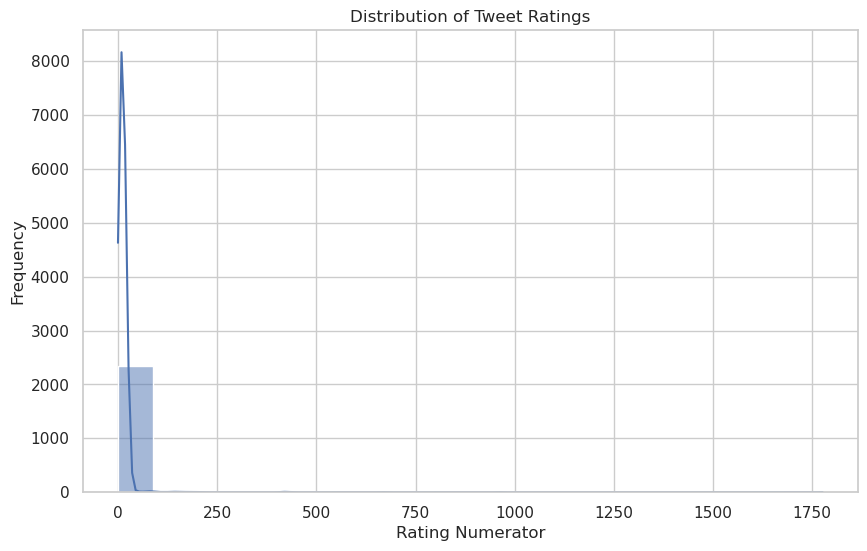

In [84]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(meraged_data['rating_numerator'], bins=20, kde=True)
plt.title('Distribution of Tweet Ratings')
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_86602/2141821778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dog_names.values, y=top_dog_names.index, palette='viridis')


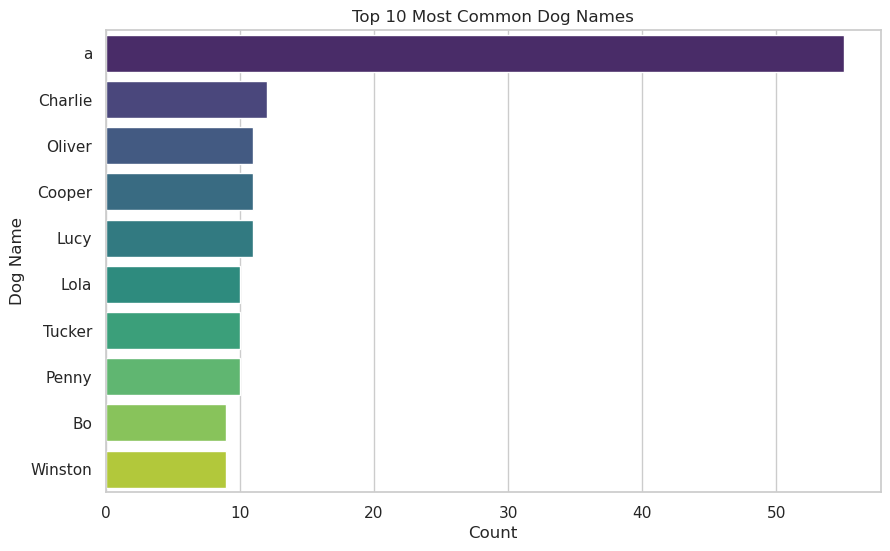

In [85]:
top_dog_names = meraged_data['name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_dog_names.values, y=top_dog_names.index, palette='viridis')
plt.title('Top 10 Most Common Dog Names')
plt.xlabel('Count')
plt.ylabel('Dog Name')
plt.show()

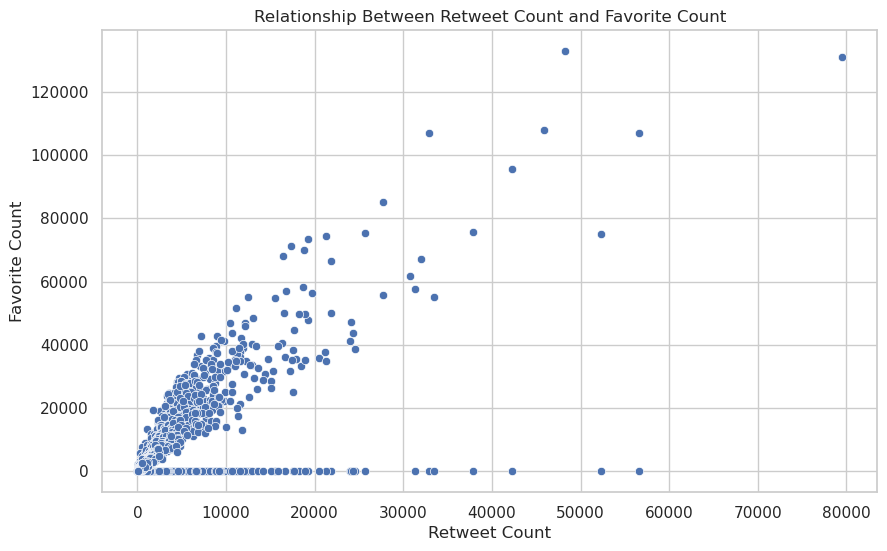

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='retweet_count', y='favorite_count', data=meraged_data)
plt.title('Relationship Between Retweet Count and Favorite Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.show()